In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random
import pickle
plt.style.use("ggplot")

In [2]:
import scipy.io
Fnt = scipy.io.loadmat('FntT\lists_var_size')
Img = scipy.io.loadmat('ImgT\lists')

In [3]:
#Load for the computer generated images
TlabelsFnt = Fnt['list'][0][0][0]
TnamesFnt = Fnt['list'][0][0][1]
clabelsFnt = Fnt['list'][0][0][2]
cnamesFnt =  Fnt['list'][0][0][3]

#Load for the actual images
TlabelsImg = Img['list'][0][0][2]
TnamesImg = Img['list'][0][0][0]
gbImg = Img['list'][0][0][1]
clabelsImg = Img['list'][0][0][3]
cnamesImg =  Img['list'][0][0][4]

In [4]:
DATADIR = "Fnt\\"
FOLDERS = []
for i in range(1,63):
    if i < 10:
        FOLDERS.append("Sample00"+str(i))
    else:
        FOLDERS.append("Sample0"+str(i))

In [5]:
IMG_SIZE = 120
data = []

for folder in FOLDERS:
    path = os.path.join(DATADIR, folder)
    class_num = FOLDERS.index(folder)
    for pic in os.listdir(path):
        #print(os.path.join(path, pic))
        image = cv2.imread(os.path.join(path, pic), cv2.IMREAD_GRAYSCALE)
        array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        data.append([array, class_num])

In [6]:
random.shuffle(data)

In [15]:
np.save("data.npy", data)

In [16]:
data = np.load("data.npy")

In [17]:
X = []
y = []

In [18]:
for features, label in data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X/255

NameError: name 'keras' is not defined

In [20]:
import tensorflow as tf
import time
import keras
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

y = keras.utils.to_categorical(y)

Using TensorFlow backend.


In [38]:
model = Sequential()
model.add(Conv2D(256, (3,3), activation = "relu", padding = "same", input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))

model.add(Conv2D(256, (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))

#model.add(Conv2D(256, (3,3), activation = "relu", padding = "same"))
#model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(62, activation = "softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

model.fit(X, y, batch_size = 64, validation_split = 0.1, epochs = 5)
model.save(f"models/2x256_33-{time.time()}.h5")
model.save("models/latest.h5")

Train on 56692 samples, validate on 6300 samples
Epoch 1/5
56692/56692 [==============================] - 209s 4ms/step - loss: 1.0018 - acc: 0.7264 - val_loss: 0.4315 - val_acc: 0.8595
Epoch 2/5
56692/56692 [==============================] - 206s 4ms/step - loss: 0.4568 - acc: 0.8475 - val_loss: 0.3447 - val_acc: 0.8779
Epoch 3/5
56692/56692 [==============================] - 208s 4ms/step - loss: 0.3448 - acc: 0.8768 - val_loss: 0.3051 - val_acc: 0.8883
Epoch 4/5
56692/56692 [==============================] - 209s 4ms/step - loss: 0.2873 - acc: 0.8938 - val_loss: 0.2785 - val_acc: 0.8973
Epoch 5/5
56692/56692 [==============================] - 210s 4ms/step - loss: 0.2499 - acc: 0.9065 - val_loss: 0.2834 - val_acc: 0.8998


In [40]:
DATADIR_TEST = "Img"
CATEGORIES_TEST = ["BadImag", "GoodImg"]
FOLDERS_TEST = []
for i in range(1,63):
    if i < 10:
        FOLDERS_TEST.append("Bmp\\Sample00"+str(i))
    else:
        FOLDERS_TEST.append("Bmp\\Sample0"+str(i))

In [82]:
IMG_SIZE = 120
GoodTest = []

for folder in FOLDERS_TEST:
    path = os.path.join(DATADIR_TEST, CATEGORIES_TEST[1], folder)
    class_num = FOLDERS_TEST.index(folder)
    for pic in os.listdir(path):
        #print(os.path.join(path, pic))
        image = cv2.imread(os.path.join(path, pic), cv2.IMREAD_GRAYSCALE)
        array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        GoodTest.append([array, class_num])
        
BadTest = []

for folder in FOLDERS_TEST:
    path = os.path.join(DATADIR_TEST, CATEGORIES_TEST[0], folder)
    class_num = FOLDERS_TEST.index(folder)
    for pic in os.listdir(path):
        #print(os.path.join(path, pic))
        image = cv2.imread(os.path.join(path, pic), cv2.IMREAD_GRAYSCALE)
        array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        BadTest.append([array, class_num])

In [42]:
pickle_out = open("GoodTest.pickle", "wb")
pickle.dump(GoodTest, pickle_out)
pickle_out.close

pickle_out = open("BadTest.pickle", "wb")
pickle.dump(BadTest, pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [24]:
pickle_in = open("GoodTest.pickle", "rb")
GoodTest = pickle.load(pickle_in)

pickle_in = open("BadTest.pickle", "rb")
BadTest = pickle.load(pickle_in)

In [25]:
random.shuffle(GoodTest)
random.shuffle(BadTest)

In [26]:
Good_X = []
Good_y = []
Bad_X = []
Bad_y = []

In [27]:
for features, label in GoodTest:
    Good_X.append(features)
    Good_y.append(label)
    
for features, label in BadTest:
    Bad_X.append(features)
    Bad_y.append(label)
    
Good_X = np.array(Good_X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Good_X = Good_X/255
Bad_X = np.array(Bad_X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Bad_X = Bad_X/255

In [28]:
Good_y = keras.utils.to_categorical(Good_y)
Bad_y = keras.utils.to_categorical(Bad_y)

In [ ]:
model = keras.models.load_model("models/latest.h5")

In [39]:
Good_acc = model.evaluate(Good_X, Good_y)
Bad_acc = model.evaluate(Bad_X, Bad_y)
Good_pred = model.predict(Good_X)
Bad_pred = model.predict(Bad_X)

4798/4798 [==============================] - 7s 2ms/step


In [40]:
print(f"On the Good image dataset we have a loss of {round(Good_acc[0], 2)} and an accuracy of {round(Good_acc[1], 2)}")
print(f"On the Bad image dataset we have a loss of {round(Bad_acc[0], 2)} and an accuracy of {round(Bad_acc[1], 2)}")

On the Good image dataset we have a loss of 3.74 and an accuracy of 0.15
On the Bad image dataset we have a loss of 3.98 and an accuracy of 0.08


In [31]:
import operator
def implicit(l):
    max_idx, max_val = max(enumerate(l), key=operator.itemgetter(1))
    return max_idx, max_val

28
(47, 0.11268429)
[0.01183315 0.02829354 0.00055938 0.00588979 0.02702537 0.00997247
 0.01565903 0.00103425 0.01061713 0.00740199 0.08772679 0.00422939
 0.01166323 0.01087627 0.00314905 0.0047751  0.01059862 0.00465877
 0.04624441 0.04249408 0.02672012 0.01309995 0.00219209 0.01503708
 0.0219743  0.00209988 0.01244328 0.00539412 0.05909584 0.00560086
 0.01066263 0.0125861  0.00218213 0.01089567 0.00773493 0.01282769
 0.02760534 0.01052171 0.00586519 0.00859124 0.00690374 0.00903702
 0.02567777 0.01419685 0.00748798 0.01701952 0.02593306 0.11268429
 0.00352883 0.00471643 0.00758802 0.00796937 0.00573753 0.01166783
 0.03729499 0.01496899 0.00624757 0.00469935 0.00376962 0.02862471
 0.02033692 0.00607767]


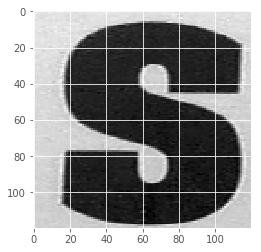

In [43]:
i = 5
plt.imshow(GoodTest[i][0], cmap = "binary")
print(GoodTest[i][1])
print(implicit(Good_pred[i]))
print(Good_pred[i])